# NLP Modeling 

1. Get your raw text into a pandas dataframe
2. Tokenize the text - splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens. 
3. Clean the text - this includes removing stopwords, punctuation and stems or lemmatizing 
4. Vectorize the text - convert the text to numeric form 
5. Fit/train an ML and/or deep learning model 


In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 100)

from matplotlib import pyplot
import numpy as np
%matplotlib inline

import re
import string
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split


df = pd.read_csv("/Users/amberyandow/Downloads/superheroes_nlp_dataset.csv")
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...","On rare occasions, and through unusual circumstances, Jones has been able to tap into a myster...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
name                                1448 non-null object
real_name                           1301 non-null object
full_name                           956 non-null object
overall_score                       1450 non-null object
history_text                        1360 non-null object
powers_text                         1086 non-null object
intelligence_score                  1450 non-null int64
strength_score                      1450 non-null int64
speed_score                         1450 non-null int64
durability_score                    1450 non-null int64
power_score                         1450 non-null int64
combat_score                        1450 non-null int64
superpowers                         1450 non-null object
alter_egos                          1450 non-null object
aliases                             1450 non-null object
place_of_birth                      788 non-n

In [3]:
df = df[['name', 'history_text', 'creator', 'alignment']]
df.head()

,name,history_text,creator,alignment
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good
1,514A (Gotham),He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on...,DC Comics,NaN
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 1449
Data columns (total 4 columns):
name            1167 non-null object
history_text    1167 non-null object
creator         1167 non-null object
alignment       1167 non-null object
dtypes: object(4)
memory usage: 45.6+ KB


In [5]:
df.alignment.value_counts()

Good       690
Bad        383
Neutral     94
Name: alignment, dtype: int64

## Create a pipeline to clean our text 

1. Remove punctuation
2. Tokenization
3. Remove stopwords
4. Lemmatize/Stem

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def clean_history(history):
    history = "".join([word for word in history if word not in string.punctuation])
    tokens = re.split('\W+', history)
    history = [ps.stem(word) for word in tokens if word not in stopwords]
    return history

df['history_clean'] = df['history_text'].apply(lambda x: clean_history(x.lower()))



In [8]:
df.head()

,name,history_text,creator,alignment,history_clean
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good,"[delroy, garrett, jr, grew, becom, track, star, compet, olymp, game, test, posit, steroid, lost,..."
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good,"[, richard, rick, jone, orphan, young, age, expel, sever, orphanag, disciplinari, reason, place,..."
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good,"[aa, one, passiv, member, pumic, peopl, race, stoneworld, hal, jordan, attempt, restart, green, ..."
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good,"[aaron, cash, head, secur, arkham, asylum, hook, hand, real, hand, eaten, killer, croc]"
5,Aayla Secura,ayla Secura was a Rutian Twi'lek Jedi Knight (and onetime apprentice to Quinlan Vos) who served ...,George Lucas,Good,"[ayla, secura, rutian, twilek, jedi, knight, onetim, apprentic, quinlan, vo, serv, clone, war, f..."


## Vectorizing History Text: TF-IDF

In [9]:
tfidf_vect = TfidfVectorizer(analyzer=clean_history)
X_tfidf = tfidf_vect.fit_transform(df['history_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(1167, 21671)
['', '0', '002', '0068', '01', '03', '030', '071', '08', '084', '09', '1', '10', '100', '1000', '10000', '100000', '1000000', '1000000000', '100feet', '100thfloor', '100year', '101', '1014', '103', '105', '107th', '1090', '10ft', '10th', '10yearold', '11', '1165', '117', '118', '1191', '11th', '11yearold', '12', '120', '1200', '12000', '121', '122', '1257', '12th', '13', '132', '1383', '13foot', '13th', '14', '1400', '1417', '142', '145', '1459', '1476', '1479', '14yearsold', '15', '150', '1500', '15000', '1503', '1513', '152', '1524', '154600706', '1576', '1591', '15yearold', '16', '1600', '1602', '1610', '1630', '1666', '167', '168', '1691', '1692', '1698', '16bit', '16th', '17', '170000', '170000year', '1748', '1792', '1797', '17th', '17thcenturi', '18', '1800', '18000', '180degre', '180lb', '1820', '183', '1839', '183rd', '1854', '1860', '1865', '1868', '1872', '1873', '1880', '1882', '1888', '1890', '1892', '1895', '1897', '1899', '18th', '19', '1900', '1901', '1902'

#### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [10]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,0,002,0068,01,03,030,071,08,084,...,ланья,петровна,сергеевна,тёмная,الساحر,الغول,رأس,アーカード,拳王,駄犬
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.013703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering 

In [11]:
df['history_len'] = df['history_text'].apply(lambda x: len(x) - x.count(" ")) #subtracting whitespace
df.head()

,name,history_text,creator,alignment,history_clean,history_len
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good,"[delroy, garrett, jr, grew, becom, track, star, compet, olymp, game, test, posit, steroid, lost,...",426
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good,"[, richard, rick, jone, orphan, young, age, expel, sever, orphanag, disciplinari, reason, place,...",4849
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good,"[aa, one, passiv, member, pumic, peopl, race, stoneworld, hal, jordan, attempt, restart, green, ...",4933
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good,"[aaron, cash, head, secur, arkham, asylum, hook, hand, real, hand, eaten, killer, croc]",98
5,Aayla Secura,ayla Secura was a Rutian Twi'lek Jedi Knight (and onetime apprentice to Quinlan Vos) who served ...,George Lucas,Good,"[ayla, secura, rutian, twilek, jedi, knight, onetim, apprentic, quinlan, vo, serv, clone, war, f...",637


/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


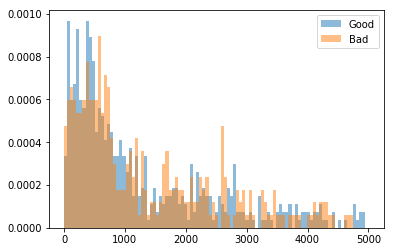

In [12]:
bins = np.linspace(0, 5000, 100)
pyplot.hist(df[df['alignment'] == 'Good']['history_len'], bins, alpha=0.5, normed=True, label='Good')
pyplot.hist(df[df['alignment'] == 'Bad']['history_len'], bins, alpha=0.5, normed=True, label='Bad')
pyplot.legend(loc='upper right')
pyplot.show()

In [13]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

df['percent_punct'] = df['history_text'].apply(lambda x: count_punct(x))
df.head()

,name,history_text,creator,alignment,history_clean,history_len,percent_punct
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good,"[delroy, garrett, jr, grew, becom, track, star, compet, olymp, game, test, posit, steroid, lost,...",426,3.5
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good,"[, richard, rick, jone, orphan, young, age, expel, sever, orphanag, disciplinari, reason, place,...",4849,3.0
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good,"[aa, one, passiv, member, pumic, peopl, race, stoneworld, hal, jordan, attempt, restart, green, ...",4933,3.0
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good,"[aaron, cash, head, secur, arkham, asylum, hook, hand, real, hand, eaten, killer, croc]",98,2.0
5,Aayla Secura,ayla Secura was a Rutian Twi'lek Jedi Knight (and onetime apprentice to Quinlan Vos) who served ...,George Lucas,Good,"[ayla, secura, rutian, twilek, jedi, knight, onetim, apprentic, quinlan, vo, serv, clone, war, f...",637,2.2


/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


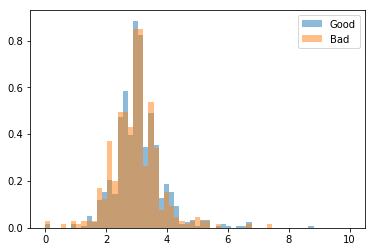

In [14]:
bins = np.linspace(0, 10, 60)
pyplot.hist(df[df['alignment'] == 'Good']['percent_punct'], bins, alpha=0.5, normed=True, label='Good')
pyplot.hist(df[df['alignment'] == 'Bad']['percent_punct'], bins, alpha=0.5, normed=True, label='Bad')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
bins = np.linspace(0, 4000, 50)

pyplot.hist(df['history_len'], bins)
pyplot.title("History Length Distribution")
pyplot.show()

In [ ]:
bins = np.linspace(0, 10, 50)

pyplot.hist(df['percent_punct'], bins)
pyplot.title("History Length Distribution")
pyplot.show()

In [ ]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((df['history_len'])**(1/i), bins=50)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

In [ ]:
df['history_len'] = round(df['history_len']**(1/i), 2)

In [ ]:
X_tfidf_df.info()

In [ ]:
X = pd.concat([df['history_len'], df['percent_punct'], X_tfidf_df], axis=1)
X.head()

In [ ]:
X.isna().sum()

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_tfidf_df, df['alignment'], cv=k_fold, scoring='accuracy', n_jobs=-1)

## RNNs 

#### TF-IDF

![](https://image.slidesharecdn.com/9bc43139-1398-4c31-a9cf-ed08dd37ef13-150521205535-lva1-app6891/95/text-mining-association-rules-and-decision-tree-learning-26-638.jpg?cb=1432241853)

#### Word-to-Vec
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/07/img_8.png)

#### Recurrent Neural Networks 
![](https://www.nexmo.com/wp-content/uploads/2020/10/Recurrent-neural-network.png)